# PER IL CORRETTO FUNZIONAMENTO DEL CODICE:


# Librerie usate

In [2]:
import time
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

# Visualizazione Dataset

In [3]:
data = pd.read_csv("dataset.csv")
data

,premio_effet_anno_incorso,eta_polizza,bonus_malus
0,1951.40000,3,11
1,265.46190,9,1F
2,276.84340,10,1G
3,289.58118,6,1H
4,173.86400,24,1F
...,...,...,...
45386,239.41000,32,1G
45387,250.79000,33,1H
45388,350.39570,8,1F
45389,364.18740,9,1G


In [4]:
data_2 = pd.read_csv("dataset.csv")
data_2.sort_values(by=['eta_polizza'], ascending = True, inplace = True)
data_2

,premio_effet_anno_incorso,eta_polizza,bonus_malus
38025,687.4300,0,01
40456,200.8500,0,1A
40453,754.4300,0,11
40450,254.5542,0,03
40447,503.8700,0,14
...,...,...,...
18214,204.0500,34,1F
5226,356.4800,34,1H
43838,211.3600,34,1H
696,310.9500,34,1E


# FUNZIONI 

Funzione per lo sceglimento della colonna 

In [5]:
def input_colonna():
    fatto = False
    while not fatto:
        try:
            osservabili = data.columns[:]
            o = input("Osservabile: ")
            if o == "0":
                print("FINE")
                break
            elif o in osservabili:
                x = data[o]
                x
                break
            elif o != osservabili.any(): 
                print("Colonna sconosciuta!")
                print("Colonne conosciute: ", osservabili)
            else:
                fatto = True
        except ValueError: #se l'utente inserirà una stringa verrà stampato un errore
            print("Deve essere nelle colonne:",osservabili)
    return o

funzioni algoritmi

In [6]:
def insertionSort(arr):
    # Scorri da 1 a  len(arr)#
    for i in range(1, len(arr)):
        
  
        key = arr[i]
  
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key
        
def bubbleSort(arr):
    n = len(arr)
    # Traverse through all array elements
    for i in range(n-1):
    # range(n) also work but outer loop will repeat one time more than needed.
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
def quickSort(array):
    length = len(array)
    
    if length <= 1:
        return array
    
    if length == 2:
        if array[0] > array[1]:
            return [array[1], array[0]]
        else:
            return array
        
    else:
        pivot = np.random.randint(0, length)
        small = []
        large = []
        
        for element in array:
            if element < array[pivot]:
                small.append(element)
            elif element > array[pivot]:
                large.append(element)
                
        if not small:
            return [array[pivot]] + quickSort(large)
        elif not large:
            return quickSort(small) + [array[pivot]]
        else:
            return (quickSort(small)
                    + [array[pivot]]
                    + quickSort(large))

def mergeSort(myList):
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0

        # Iterator for the main list
        k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1
            #per tutti i resto dei numeri 
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1
            
def countingSort(arr, exp1):
    n = len(arr)
    # The output array elements that will have sorted arr
    output = [0] * (n)
    # initialize count array as 0
    count = [0] * (10)
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = (arr[i] / exp1)
        count[int(index % 10)] += 1
    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]
    # Build the output array
    i = n - 1
    while i >= 0:
        index = (arr[i] / exp1)
        output[count[int(index % 10)] - 1] = arr[i]
        count[int(index % 10)] -= 1
        i -= 1
    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
        
def radixSort(arr):
    # Find the maximum number to know number of digits
    max1 = max(arr)
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp > 0:
        countingSort(arr, exp)
        exp *= 10

def max_heapify(array, i):
    l = (i+1) * 2 - 1
    r = (i+1) * 2
    length = len(array)
    if l < length and array[l] > array[i]:
        largest = l
    else: 
        largest = i
    
    if r < length and array[r] > array[largest]:
        largest = r
        
    if largest != i:
        largest_value = array[largest]
        array[largest] = array[i]
        array[i] = largest_value
        max_heapify(array, largest)
        
    return array

def build_max_heap(array):
    length = len(array)
    for i in range(length//2, -1, -1):
        max_heapify(array, i)
    return array

def heapSort(array):
    length = len(array)
    array = build_max_heap(array)
    for i in range(length-1, 0, -1):
        largest = array[0]
        array[0] = array[i]
        array[i] = largest
        max_heapify(array[:i], 0)
        
    return array

# Dimostrazione ordinamento 

In [9]:
xmerge = data["eta_polizza"] 
_subset = xmerge[0 : 2000]
arr = np.array(_subset)
list_merge= arr.tolist()

mergeSort(list_merge)
record_merge = []
for i in range(len(list_merge)):
    record_merge.append("%s" %list_merge[i])
with open("record_ordinati_merge_interi.txt", "w") as file:
    file.write(str(record_merge))

In [10]:
xheap = data["eta_polizza"] 
_subset = xheap[0 : 2000]
arr = np.array(_subset)
list_heap= arr.tolist()

heapSort(list_heap)
record_heap = []
for i in range(len(list_heap)):
    record_heap.append("%s" %list_heap[i])
with open("record_ordinati_heap_interi.txt", "w") as file:
    file.write(str(record_heap))

In [11]:
xquick = data["eta_polizza"] 
_subset = xquick[0 : 2000]
arr = np.array(_subset)
list_quick= arr.tolist()

quickSort(list_quick)
record_quick = []
for i in range(len(list_quick)):
    record_quick.append("%s" %list_quick[i])
with open("record_ordinati_quick_interi.txt", "w") as file:
    file.write(str(record_quick))

In [12]:
xins = data["eta_polizza"] 
_subset = xins[0 : 2000]
arr = np.array(_subset)
list_ins= arr.tolist()

insertionSort(list_ins)
record_ins = []
for i in range(len(list_ins)):
    record_ins.append("%s" %list_ins[i])
with open("record_ordinati_insertion_interi.txt", "w") as file:
    file.write(str(record_ins))

In [13]:
xradix = data["eta_polizza"] 
_subset = xradix[0 : 2000]
arr = np.array(_subset)
list_radix= arr.tolist()

radixSort(list_radix)
record_radix = []
for i in range(len(list_radix)):
    record_radix.append("%s" %list_radix[i])
with open("record_ordinati_radix_interi.txt", "w") as file:
    file.write(str(record_radix))

In [14]:
xbubble = data["eta_polizza"] 
_subset = xbubble[0 : 2000]
arr = np.array(_subset)
list_bubble= arr.tolist()

bubbleSort(list_bubble)
record_bubble = []
for i in range(len(list_bubble)):
    record_bubble.append("%s" %list_bubble[i])
with open("record_ordinati_bubble_interi.txt", "w") as file:
    file.write(str(record_bubble))

# Grafici tempo esecuzione singoli algoritmi 

## Record non ordinati su numeri interi 
### test su 45mila elementi 

9000 Elements Sorted by MergeSort in  0.03989243507385254
18000 Elements Sorted by MergeSort in  0.08260393142700195
27000 Elements Sorted by MergeSort in  0.1186821460723877
36000 Elements Sorted by MergeSort in  0.17104816436767578
45000 Elements Sorted by MergeSort in  0.21971440315246582


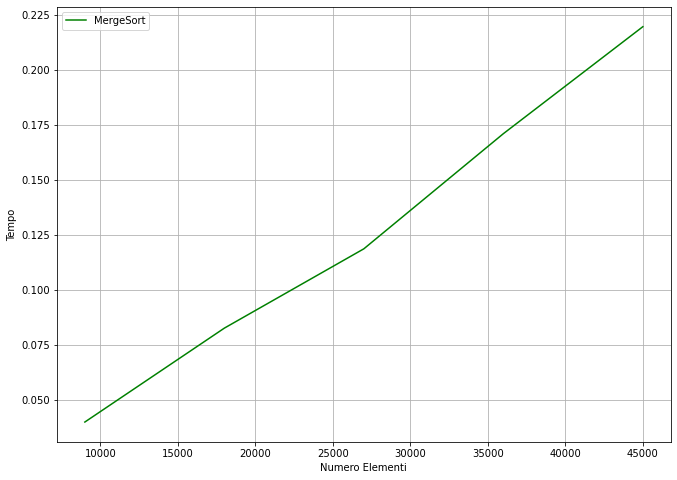

In [15]:
#MERGE
elements_merge = list()
times_merge = list()
for i in range(1, 6):
  
    xmerge = data['eta_polizza'] 
    _subset = xmerge[0 : 9000*i]
    arr = np.array(_subset)
    list_merge = arr.tolist()
    start = time.time()
    mergeSort(list_merge)
    end = time.time()
  
    print(len(list_merge), "Elements Sorted by MergeSort in ", end-start)
    elements_merge.append(len(list_merge))
    times_merge.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_merge, times_merge, label ='MergeSort',color = 'g')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by BubbleSort in  10.13413119316101
18000 Elements Sorted by BubbleSort in  41.37134075164795
27000 Elements Sorted by BubbleSort in  98.39142036437988
36000 Elements Sorted by BubbleSort in  177.58945393562317
45000 Elements Sorted by BubbleSort in  295.1170108318329


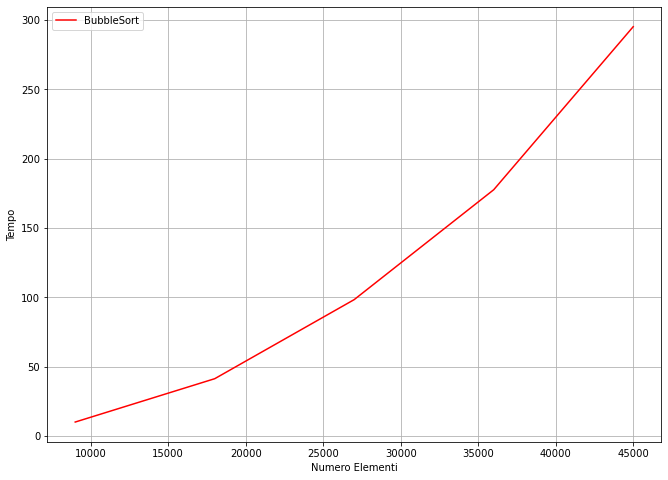

In [60]:
#BUBBLE
elements_bubble = list()
times_bubble = list()
for i in range(1, 6):
  
    xbubble = data['eta_polizza'] 
    _subset = xbubble[0 : 9000*i]
    arr = np.array(_subset)
    list_bubble = arr.tolist()
    start = time.time()
    bubbleSort(list_bubble)
    end = time.time()
  
    print(len(list_bubble), "Elements Sorted by BubbleSort in ", end-start)
    elements_bubble.append(len(list_bubble))
    times_bubble.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_bubble, times_bubble, label ='BubbleSort',color = 'r')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by InsertionSort in  4.64075493812561
18000 Elements Sorted by InsertionSort in  19.30941939353943
27000 Elements Sorted by InsertionSort in  46.78692984580994
36000 Elements Sorted by InsertionSort in  87.43612551689148
45000 Elements Sorted by InsertionSort in  160.91168570518494


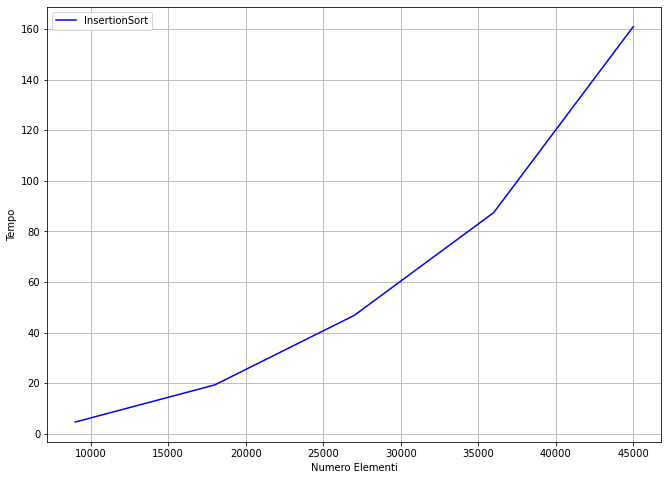

In [63]:
#INSERTION
elements_inse = list()
times_inse = list()
for i in range(1, 6):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 9000*i]
    arr = np.array(_subset)
    list_inse = arr.tolist()
    start = time.time()
    insertionSort(list_inse)
    end = time.time()
  
    print(len(list_inse), "Elements Sorted by InsertionSort in ", end-start)
    elements_inse.append(len(list_inse))
    times_inse.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_inse, times_inse, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by RadixSort in  3.8860669136047363
18000 Elements Sorted by RadixSort in  7.835927486419678
27000 Elements Sorted by RadixSort in  11.407922983169556
36000 Elements Sorted by RadixSort in  15.276851892471313
45000 Elements Sorted by RadixSort in  18.942102909088135


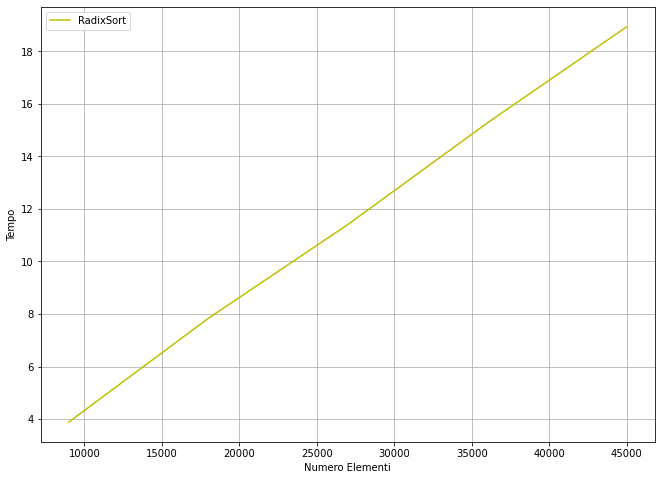

In [18]:
#RADIX
elements_radix = list()
times_radix = list()
for i in range(1, 6):
  
    xradix = data['eta_polizza'] 
    _subset = xradix[0 : 9000*i]
    arr = np.array(_subset)
    list_radix = arr.tolist()
    start = time.time()
    radixSort(list_radix)
    end = time.time()
  
    print(len(list_radix), "Elements Sorted by RadixSort in ", end-start)
    elements_radix.append(len(list_radix))
    times_radix.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radix, times_radix, label ='RadixSort',color = 'y')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by QuickSort in  0.005982875823974609
18000 Elements Sorted by QuickSort in  0.01353001594543457
27000 Elements Sorted by QuickSort in  0.017823457717895508
36000 Elements Sorted by QuickSort in  0.027861356735229492
45000 Elements Sorted by QuickSort in  0.03191399574279785


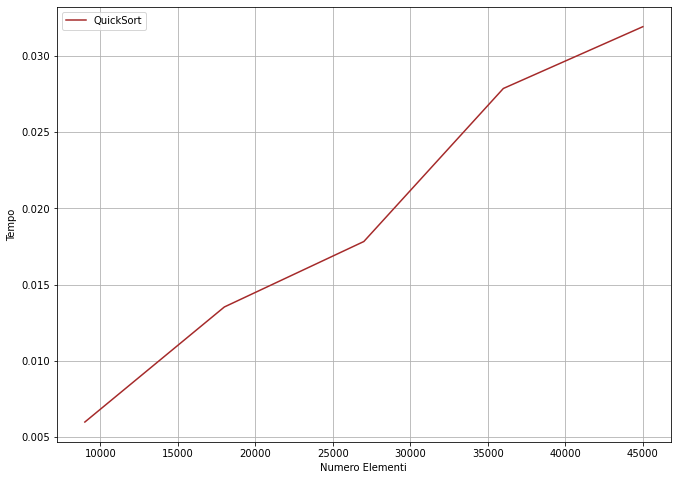

In [27]:
#QUICKSORT
elements_quick = list()
times_quick = list()
for i in range(1, 6):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 9000*i]
    arr = np.array(_subset)
    list_quick = arr.tolist()
    start = time.time()
    quickSort(list_quick)
    end = time.time()
  
    print(len(list_quick), "Elements Sorted by QuickSort in ", end-start)
    elements_quick.append(len(list_quick))
    times_quick.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by HeapSort in  0.2055344581604004
18000 Elements Sorted by HeapSort in  0.5990586280822754
27000 Elements Sorted by HeapSort in  1.2147550582885742
36000 Elements Sorted by HeapSort in  1.919419527053833
45000 Elements Sorted by HeapSort in  2.9186887741088867


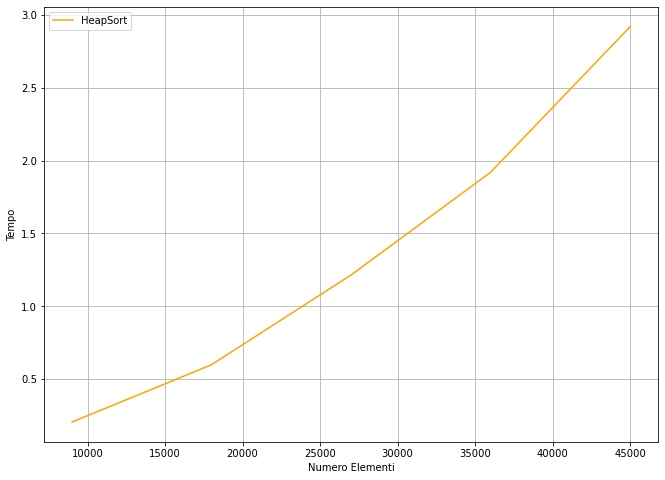

In [70]:
elements_heap = list()
times_heap = list()
for i in range(1, 6):
  
    xheap = data['eta_polizza'] 
    _subset = xheap[0 : 9000*i]
    arr = np.array(_subset)
    list_heap = arr.tolist()
    start = time.time()
    heapSort(list_heap)
    end = time.time()
  
    print(len(list_heap), "Elements Sorted by HeapSort in ", end-start)
    elements_heap.append(len(list_heap))
    times_heap.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

## Confronto di tutti gli algoritmi
### test con 45mila elementi 

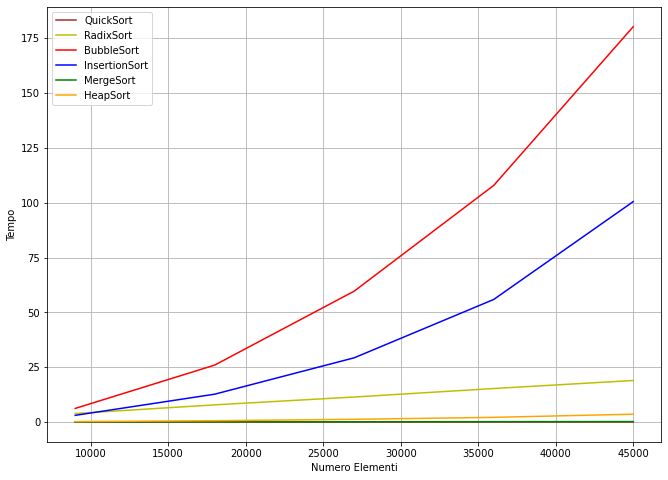

In [28]:
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.plot(elements_radix, times_radix, label ='RadixSort',color = 'y')
plt.plot(elements_bubble, times_bubble, label ='BubbleSort',color = 'r')
plt.plot(elements_inse, times_inse, label ='InsertionSort',color = 'b')
plt.plot(elements_merge, times_merge, label ='MergeSort',color = 'g')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')

plt.grid()
plt.legend()
plt.show()

## confronto tra algoritmi specifici

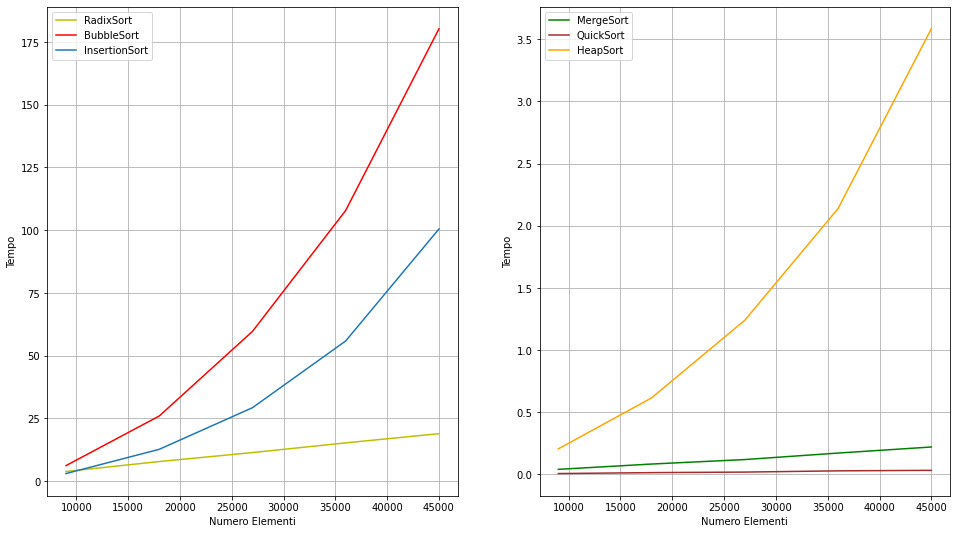

In [31]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radix, times_radix, label ='RadixSort',color = 'y')
plt.plot(elements_bubble, times_bubble, label ='BubbleSort',color = 'r')
plt.plot(elements_inse, times_inse, label ='InsertionSort')
plt.grid()
plt.legend()
plt.subplot(132)
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_merge, times_merge, label ='MergeSort', color = 'g')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

# Grafici tempo esecuzione singoli algoritmi
## Record non ordinati su numeri interi
### test su 20mila elementi

In [33]:
#MERGE
elements_merge20k = list()
times_merge20k = list()
for i in range(1, 5):
  
    xmerge = data['eta_polizza'] 
    _subset = xmerge[0 : 5000*i]
    arr = np.array(_subset)
    list_merge = arr.tolist()
    start = time.time()
    mergeSort(list_merge)
    end = time.time()
  
    print(len(list_merge), "Elements Sorted by MergeSort in ", end-start)
    elements_merge20k.append(len(list_merge))
    times_merge20k.append(end-start)

5000 Elements Sorted by MergeSort in  0.03307032585144043
10000 Elements Sorted by MergeSort in  0.06935262680053711
15000 Elements Sorted by MergeSort in  0.09870600700378418
20000 Elements Sorted by MergeSort in  0.13962864875793457


In [35]:
#BUBBLE
elements_bubble20k = list()
times_bubble20k = list()
for i in range(1, 5):
  
    xbubble = data['eta_polizza'] 
    _subset = xbubble[0 : 5000*i]
    arr = np.array(_subset)
    list_bubble = arr.tolist()
    start = time.time()
    bubbleSort(list_bubble)
    end = time.time()
  
    print(len(list_bubble), "Elements Sorted by BubbleSort in ", end-start)
    elements_bubble20k.append(len(list_bubble))
    times_bubble20k.append(end-start)

5000 Elements Sorted by BubbleSort in  3.1774983406066895
10000 Elements Sorted by BubbleSort in  11.628584861755371
15000 Elements Sorted by BubbleSort in  27.120373964309692
20000 Elements Sorted by BubbleSort in  47.640878677368164


In [36]:
#INSERTION
elements_inse20k = list()
times_inse20k = list()
for i in range(1, 5):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 5000*i]
    arr = np.array(_subset)
    list_inse = arr.tolist()
    start = time.time()
    insertionSort(list_inse)
    end = time.time()
  
    print(len(list_inse), "Elements Sorted by InsertionSort in ", end-start)
    elements_inse20k.append(len(list_inse))
    times_inse20k.append(end-start)

5000 Elements Sorted by InsertionSort in  1.522829532623291
10000 Elements Sorted by InsertionSort in  5.486408233642578
15000 Elements Sorted by InsertionSort in  12.617807865142822
20000 Elements Sorted by InsertionSort in  24.94117569923401


In [37]:
#RADIX
elements_radix20k = list()
times_radix20k = list()
for i in range(1, 5):
  
    xradix = data['eta_polizza'] 
    _subset = xradix[0 : 5000*i]
    arr = np.array(_subset)
    list_radix = arr.tolist()
    start = time.time()
    radixSort(list_radix)
    end = time.time()
  
    print(len(list_radix), "Elements Sorted by RadixSort in ", end-start)
    elements_radix20k.append(len(list_radix))
    times_radix20k.append(end-start)

5000 Elements Sorted by RadixSort in  3.255197763442993
10000 Elements Sorted by RadixSort in  6.511188745498657
15000 Elements Sorted by RadixSort in  9.878497838973999
20000 Elements Sorted by RadixSort in  13.018257141113281


In [40]:
#QUICK
elements_quick20k = list()
times_quick20k = list()
for i in range(1, 5):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 5000*i]
    arr = np.array(_subset)
    list_quick = arr.tolist()
    start = time.time()
    quickSort(list_quick)
    end = time.time()
  
    print(len(list_quick), "Elements Sorted by QuickSort in ", end-start)
    elements_quick20k.append(len(list_quick))
    times_quick20k.append(end-start)

5000 Elements Sorted by QuickSort in  0.002991914749145508
10000 Elements Sorted by QuickSort in  0.007788896560668945
15000 Elements Sorted by QuickSort in  0.010011434555053711
20000 Elements Sorted by QuickSort in  0.01555633544921875


In [41]:
#HEAP
elements_heap20k = list()
times_heap20k = list()
for i in range(1, 5):
  
    xheap = data['eta_polizza'] 
    _subset = xheap[0 : 5000*i]
    arr = np.array(_subset)
    list_heap = arr.tolist()
    start = time.time()
    heapSort(list_heap)
    end = time.time()
  
    print(len(list_heap), "Elements Sorted by HeapSort in ", end-start)
    elements_heap20k.append(len(list_heap))
    times_heap20k.append(end-start)

5000 Elements Sorted by HeapSort in  0.08579254150390625
10000 Elements Sorted by HeapSort in  0.23337745666503906
15000 Elements Sorted by HeapSort in  0.4651906490325928
20000 Elements Sorted by HeapSort in  0.7724719047546387


## Grafici: singoli e comparati 
### test su 20mila elementi

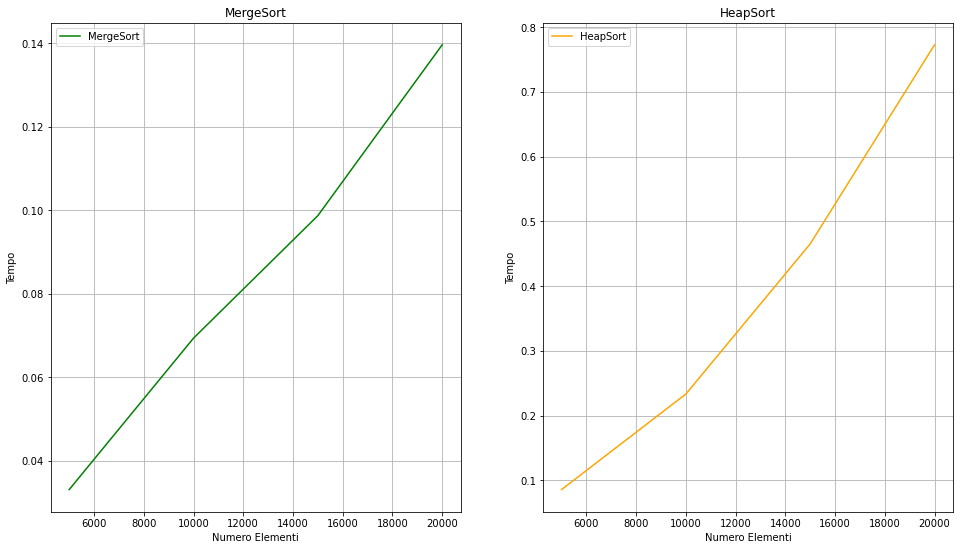

In [42]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('MergeSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_merge20k, times_merge20k, label ='MergeSort', color = 'g')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('HeapSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_heap20k, times_heap20k, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

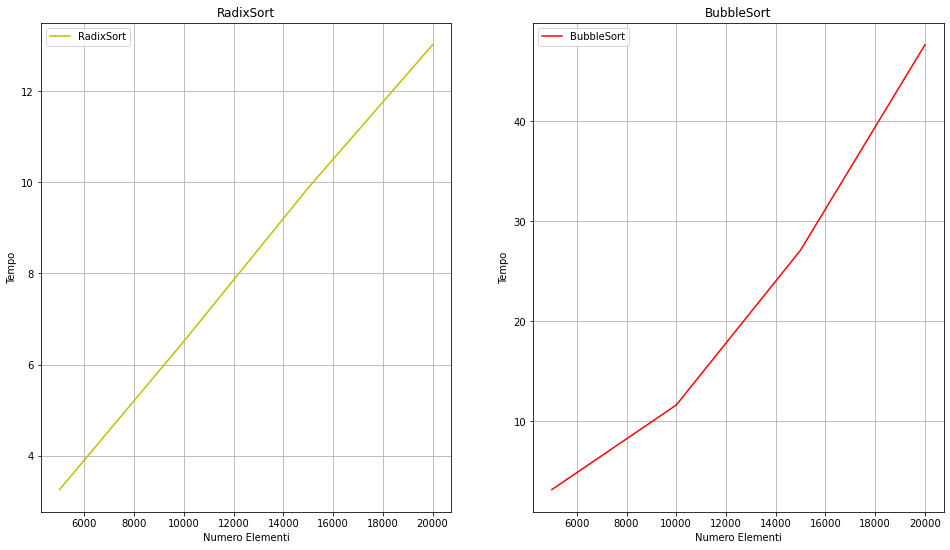

In [43]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('RadixSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radix20k, times_radix20k, label ='RadixSort', color = 'y')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('BubbleSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_bubble20k, times_bubble20k, label ='BubbleSort',color = 'r')
plt.grid()
plt.legend()
plt.show()

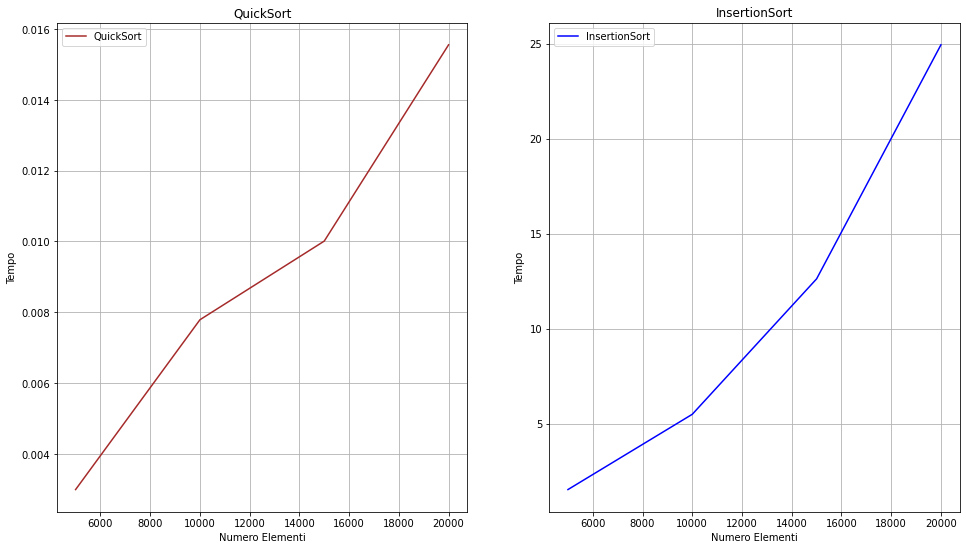

In [44]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('QuickSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick20k, times_quick20k, label ='QuickSort', color = 'brown')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('InsertionSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_inse20k, times_inse20k, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

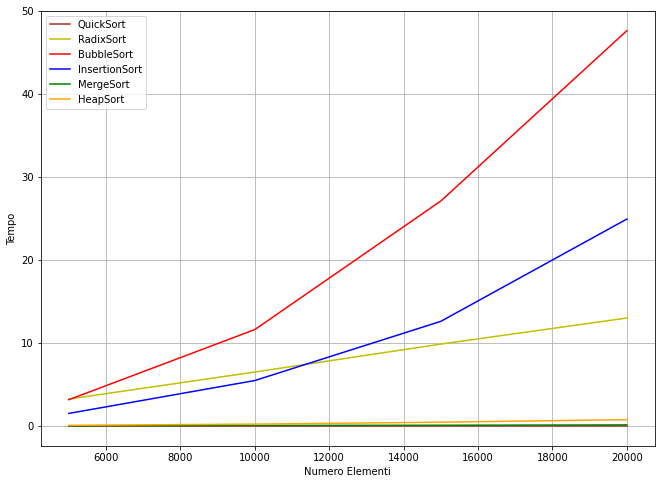

In [45]:
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick20k, times_quick20k, label ='QuickSort',color = 'brown')
plt.plot(elements_radix20k, times_radix20k, label ='RadixSort',color = 'y')
plt.plot(elements_bubble20k, times_bubble20k, label ='BubbleSort',color = 'r')
plt.plot(elements_inse20k, times_inse20k, label ='InsertionSort',color = 'b')
plt.plot(elements_merge20k, times_merge20k, label ='MergeSort',color = 'g')
plt.plot(elements_heap20k, times_heap20k, label ='HeapSort',color = 'orange')

plt.grid()
plt.legend()
plt.show()

# Grafici tempo esecuzione singoli algoritmi
## Record non ordinati su numeri interi
### test su 8mila elementi

In [46]:
#MERGE
elements_merge8k = list()
times_merge8k = list()
for i in range(1, 9):
  
    xmerge = data['eta_polizza'] 
    _subset = xmerge[0 : 1000*i]
    arr = np.array(_subset)
    list_merge = arr.tolist()
    start = time.time()
    mergeSort(list_merge)
    end = time.time()
  
    print(len(list_merge), "Elements Sorted by MergeSort in ", end-start)
    elements_merge8k.append(len(list_merge))
    times_merge8k.append(end-start)

1000 Elements Sorted by MergeSort in  0.004984378814697266
2000 Elements Sorted by MergeSort in  0.010967493057250977
3000 Elements Sorted by MergeSort in  0.02458953857421875
4000 Elements Sorted by MergeSort in  0.025963783264160156
5000 Elements Sorted by MergeSort in  0.03188371658325195
6000 Elements Sorted by MergeSort in  0.03792691230773926
7000 Elements Sorted by MergeSort in  0.04687166213989258
8000 Elements Sorted by MergeSort in  0.05183577537536621


In [47]:
#BUBBLE
elements_bubble8k = list()
times_bubble8k = list()
for i in range(1, 9):
  
    xbubble = data['eta_polizza'] 
    _subset = xbubble[0 : 1000*i]
    arr = np.array(_subset)
    list_bubble = arr.tolist()
    start = time.time()
    bubbleSort(list_bubble)
    end = time.time()
  
    print(len(list_bubble), "Elements Sorted by BubbleSort in ", end-start)
    elements_bubble8k.append(len(list_bubble))
    times_bubble8k.append(end-start)

1000 Elements Sorted by BubbleSort in  0.1318809986114502
2000 Elements Sorted by BubbleSort in  0.4617316722869873
3000 Elements Sorted by BubbleSort in  1.0854268074035645
4000 Elements Sorted by BubbleSort in  1.993527889251709
5000 Elements Sorted by BubbleSort in  3.0180504322052
6000 Elements Sorted by BubbleSort in  4.1639580726623535
7000 Elements Sorted by BubbleSort in  5.799318790435791
8000 Elements Sorted by BubbleSort in  7.396509408950806


In [48]:
#INSERTION
elements_inse8k = list()
times_inse8k = list()
for i in range(1, 9):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 1000*i]
    arr = np.array(_subset)
    list_inse = arr.tolist()
    start = time.time()
    insertionSort(list_inse)
    end = time.time()
  
    print(len(list_inse), "Elements Sorted by InsertionSort in ", end-start)
    elements_inse8k.append(len(list_inse))
    times_inse8k.append(end-start)

1000 Elements Sorted by InsertionSort in  0.0596005916595459
2000 Elements Sorted by InsertionSort in  0.21744871139526367
3000 Elements Sorted by InsertionSort in  0.5385575294494629
4000 Elements Sorted by InsertionSort in  1.0182769298553467
5000 Elements Sorted by InsertionSort in  1.4687774181365967
6000 Elements Sorted by InsertionSort in  2.0412631034851074
7000 Elements Sorted by InsertionSort in  2.661262035369873
8000 Elements Sorted by InsertionSort in  3.274012804031372


In [49]:
#RADIX
elements_radix8k = list()
times_radix8k = list()
for i in range(1, 9):
  
    xradix = data['eta_polizza'] 
    _subset = xradix[0 : 1000*i]
    arr = np.array(_subset)
    list_radix = arr.tolist()
    start = time.time()
    radixSort(list_radix)
    end = time.time()
  
    print(len(list_radix), "Elements Sorted by RadixSort in ", end-start)
    elements_radix8k.append(len(list_radix))
    times_radix8k.append(end-start)

1000 Elements Sorted by RadixSort in  0.6646349430084229
2000 Elements Sorted by RadixSort in  1.3295719623565674
3000 Elements Sorted by RadixSort in  1.9027423858642578
4000 Elements Sorted by RadixSort in  2.5791358947753906
5000 Elements Sorted by RadixSort in  3.0798773765563965
6000 Elements Sorted by RadixSort in  4.03110933303833
7000 Elements Sorted by RadixSort in  4.377518177032471
8000 Elements Sorted by RadixSort in  4.971909284591675


In [50]:
#QUICK
elements_quick8k = list()
times_quick8k = list()
for i in range(1, 9):
  
    xinsertion = data['eta_polizza'] 
    _subset = xinsertion[0 : 1000*i]
    arr = np.array(_subset)
    list_quick = arr.tolist()
    start = time.time()
    quickSort(list_quick)
    end = time.time()
  
    print(len(list_quick), "Elements Sorted by QuickSort in ", end-start)
    elements_quick8k.append(len(list_quick))
    times_quick8k.append(end-start)

1000 Elements Sorted by QuickSort in  0.0009970664978027344
2000 Elements Sorted by QuickSort in  0.0019941329956054688
3000 Elements Sorted by QuickSort in  0.001993417739868164
4000 Elements Sorted by QuickSort in  0.0025055408477783203
5000 Elements Sorted by QuickSort in  0.0034978389739990234
6000 Elements Sorted by QuickSort in  0.004498004913330078
7000 Elements Sorted by QuickSort in  0.004537820816040039
8000 Elements Sorted by QuickSort in  0.005396604537963867


In [51]:
#HEAP
elements_heap8k = list()
times_heap8k = list()
for i in range(1, 9):
  
    xheap = data['eta_polizza'] 
    _subset = xheap[0 : 1000*i]
    arr = np.array(_subset)
    list_heap = arr.tolist()
    start = time.time()
    heapSort(list_heap)
    end = time.time()
  
    print(len(list_heap), "Elements Sorted by HeapSort in ", end-start)
    elements_heap8k.append(len(list_heap))
    times_heap8k.append(end-start)

1000 Elements Sorted by HeapSort in  0.009972572326660156
2000 Elements Sorted by HeapSort in  0.02465343475341797
3000 Elements Sorted by HeapSort in  0.04079484939575195
4000 Elements Sorted by HeapSort in  0.05681872367858887
5000 Elements Sorted by HeapSort in  0.0877692699432373
6000 Elements Sorted by HeapSort in  0.10471940040588379
7000 Elements Sorted by HeapSort in  0.13521218299865723
8000 Elements Sorted by HeapSort in  0.1595754623413086


## Grafici: singoli e comparati 
### test su 8mila elementi

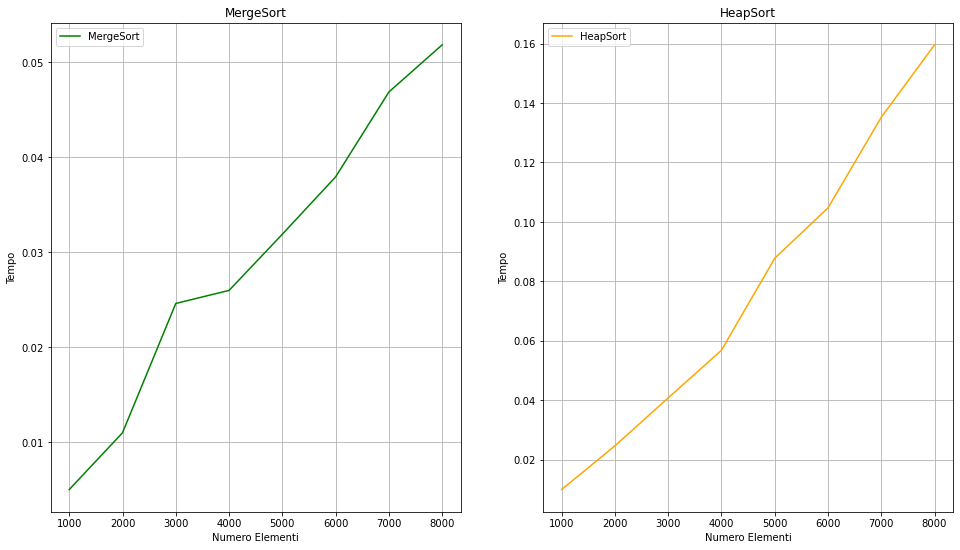

In [52]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('MergeSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_merge8k, times_merge8k, label ='MergeSort', color = 'g')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('HeapSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_heap8k, times_heap8k, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

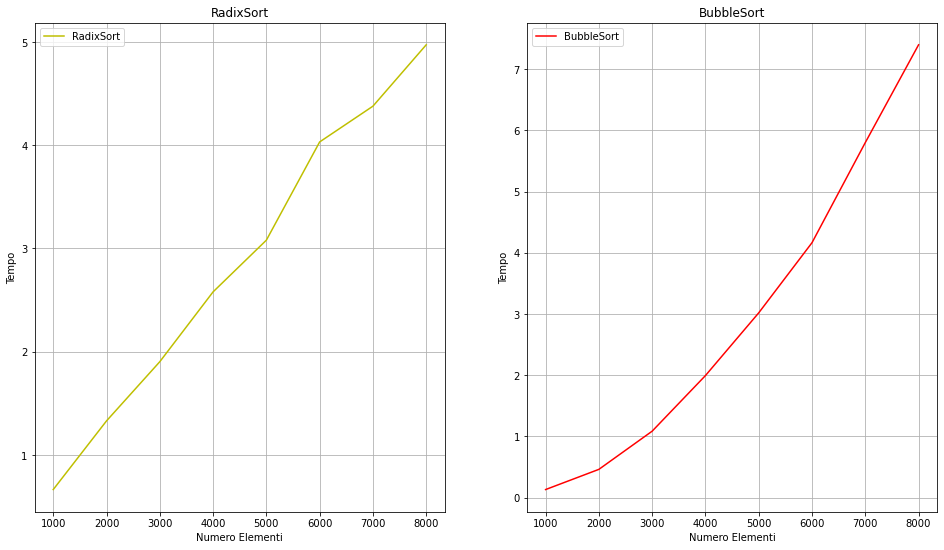

In [53]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('RadixSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radix8k, times_radix8k, label ='RadixSort', color = 'y')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('BubbleSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_bubble8k, times_bubble8k, label ='BubbleSort',color = 'r')
plt.grid()
plt.legend()
plt.show()

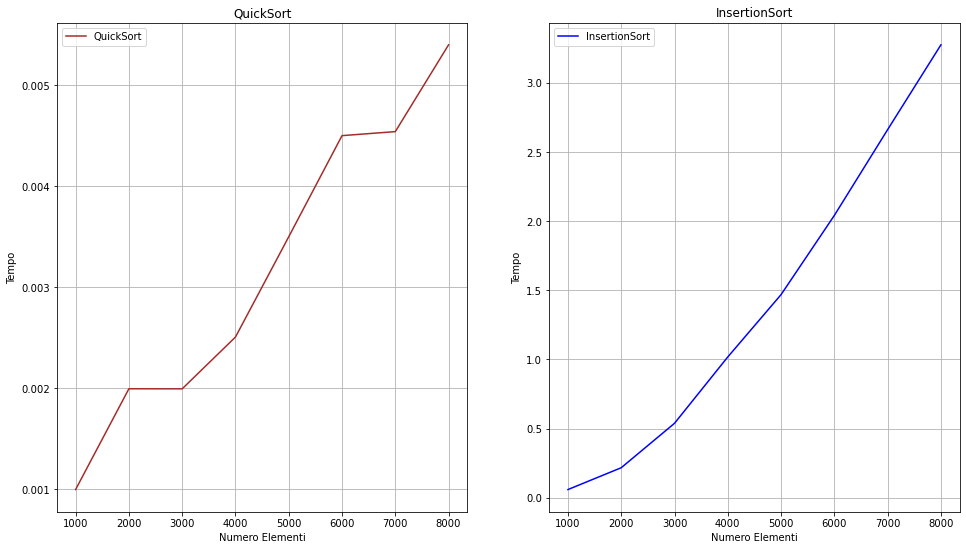

In [54]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('QuickSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8k, times_quick8k, label ='QuickSort', color = 'brown')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('InsertionSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_inse8k, times_inse8k, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

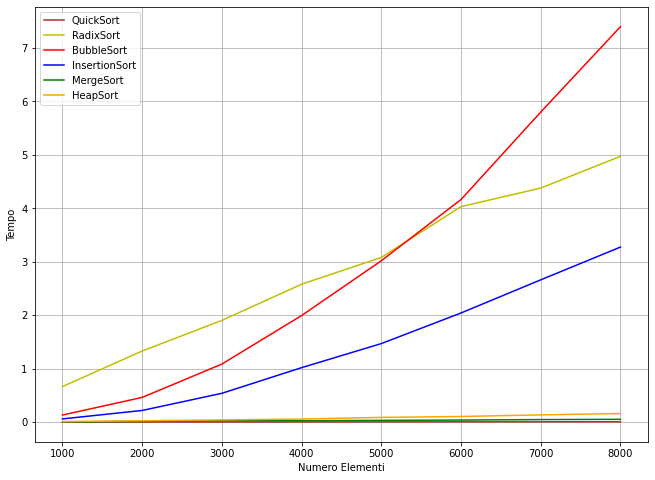

In [55]:
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8k, times_quick8k, label ='QuickSort',color = 'brown')
plt.plot(elements_radix8k, times_radix8k, label ='RadixSort',color = 'y')
plt.plot(elements_bubble8k, times_bubble8k, label ='BubbleSort',color = 'r')
plt.plot(elements_inse8k, times_inse8k, label ='InsertionSort',color = 'b')
plt.plot(elements_merge8k, times_merge8k, label ='MergeSort',color = 'g')
plt.plot(elements_heap8k, times_heap8k, label ='HeapSort',color = 'orange')

plt.grid()
plt.legend()
plt.show()

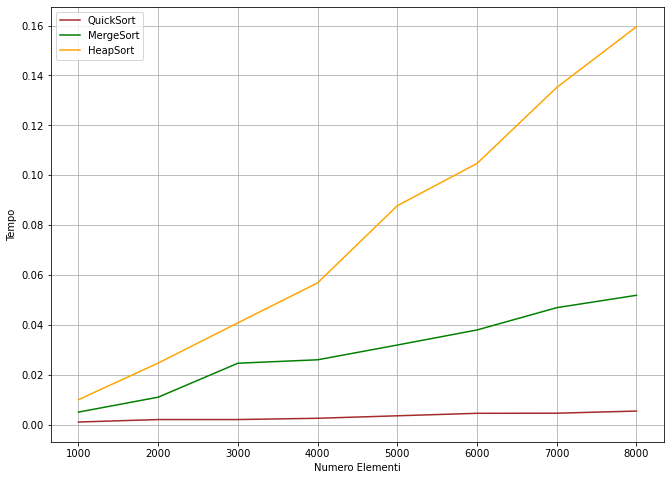

In [56]:
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8k, times_quick8k, label ='QuickSort',color = 'brown')
plt.plot(elements_merge8k, times_merge8k, label ='MergeSort',color = 'g')
plt.plot(elements_heap8k, times_heap8k, label ='HeapSort',color = 'orange')

plt.grid()
plt.legend()
plt.show()

# Grafici tempo esecuzione singoli algoritmi 

## Record ordinati su numeri interi 
### test su 45mila elementi 

9000 Elements Sorted by MergeSort in  0.054703474044799805
18000 Elements Sorted by MergeSort in  0.10870909690856934
27000 Elements Sorted by MergeSort in  0.16509008407592773
36000 Elements Sorted by MergeSort in  0.2263932228088379
45000 Elements Sorted by MergeSort in  0.28574442863464355


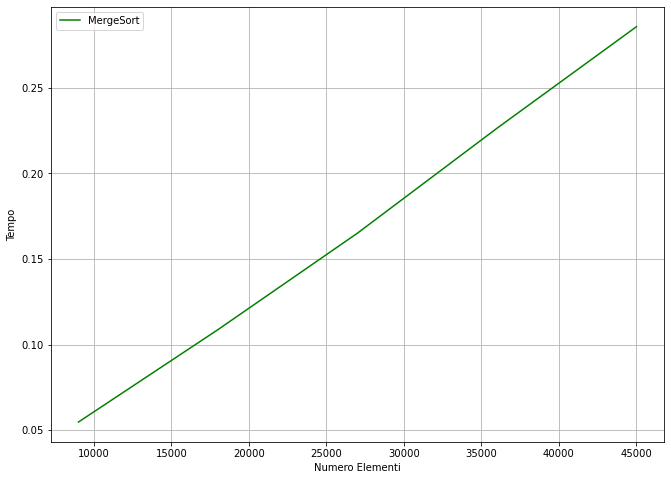

In [57]:
#MERGE
elements_mergeO = list()
times_mergeO = list()
for i in range(1, 6):
  
    xmerge = data_2['eta_polizza'] 
    _subset = xmerge[0 : 9000*i]
    arr = np.array(_subset)
    list_merge = arr.tolist()
    start = time.time()
    mergeSort(list_merge)
    end = time.time()
  
    print(len(list_merge), "Elements Sorted by MergeSort in ", end-start)
    elements_mergeO.append(len(list_merge))
    times_mergeO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_mergeO, times_mergeO, label ='MergeSort',color = 'g')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by BubbleSort in  5.257734537124634
18000 Elements Sorted by BubbleSort in  21.706648349761963
27000 Elements Sorted by BubbleSort in  49.87421154975891
36000 Elements Sorted by BubbleSort in  92.18351173400879
45000 Elements Sorted by BubbleSort in  140.9274401664734


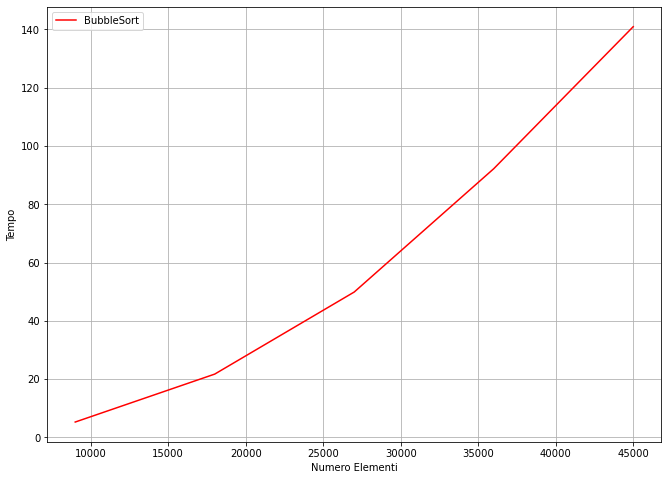

In [59]:
#BUBBLE
elements_bubbleO = list()
times_bubbleO = list()
for i in range(1, 6):
  
    xbubble = data_2['eta_polizza'] 
    _subset = xbubble[0 : 9000*i]
    arr = np.array(_subset)
    list_bubble = arr.tolist()
    start = time.time()
    bubbleSort(list_bubble)
    end = time.time()
  
    print(len(list_bubble), "Elements Sorted by BubbleSort in ", end-start)
    elements_bubbleO.append(len(list_bubble))
    times_bubbleO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_bubbleO, times_bubbleO, label ='BubbleSort',color = 'r')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by InsertionSort in  0.0029931068420410156
18000 Elements Sorted by InsertionSort in  0.0049860477447509766
27000 Elements Sorted by InsertionSort in  0.009262561798095703
36000 Elements Sorted by InsertionSort in  0.01099848747253418
45000 Elements Sorted by InsertionSort in  0.013669967651367188


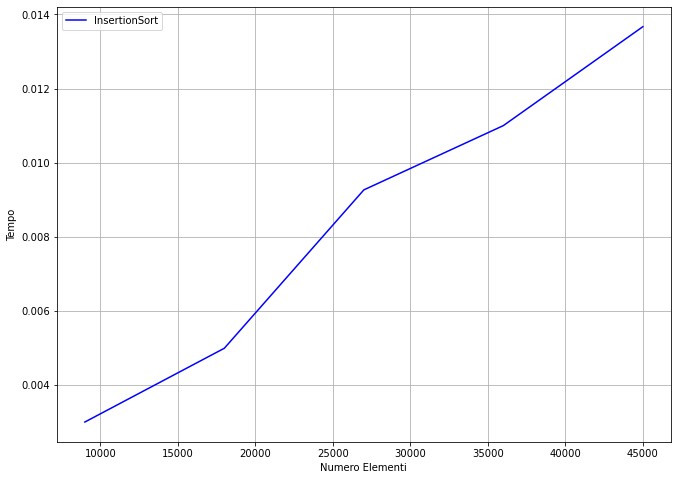

In [62]:
#INSERTION
elements_inseO = list()
times_inseO = list()
for i in range(1, 6):
  
    xinsertion = data_2['eta_polizza'] 
    _subset = xinsertion[0 : 9000*i]
    arr = np.array(_subset)
    list_inse = arr.tolist()
    start = time.time()
    insertionSort(list_inse)
    end = time.time()
  
    print(len(list_inse), "Elements Sorted by InsertionSort in ", end-start)
    elements_inseO.append(len(list_inse))
    times_inseO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_inseO, times_inseO, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by RadixSort in  5.179140090942383
18000 Elements Sorted by RadixSort in  10.729995727539062
27000 Elements Sorted by RadixSort in  17.70562195777893
36000 Elements Sorted by RadixSort in  23.838548183441162
45000 Elements Sorted by RadixSort in  29.651176691055298


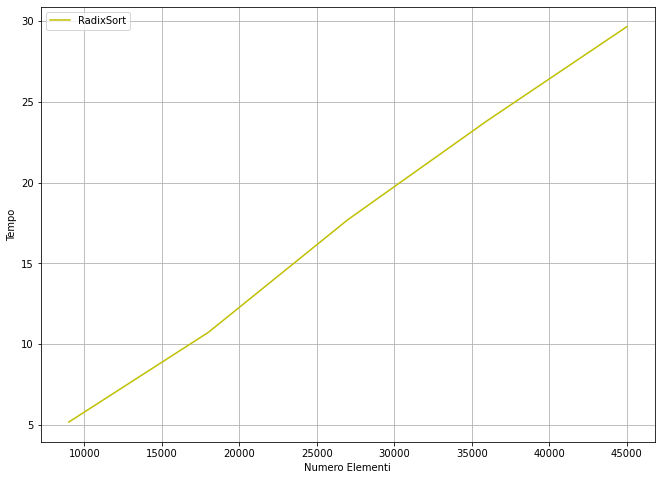

In [64]:
#RADIX
elements_radixO = list()
times_radixO = list()
for i in range(1, 6):
  
    xradix = data_2['eta_polizza'] 
    _subset = xradix[0 : 9000*i]
    arr = np.array(_subset)
    list_radix = arr.tolist()
    start = time.time()
    radixSort(list_radix)
    end = time.time()
  
    print(len(list_radix), "Elements Sorted by RadixSort in ", end-start)
    elements_radixO.append(len(list_radix))
    times_radixO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radixO, times_radixO, label ='RadixSort',color = 'y')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by QuickSort in  0.0019958019256591797
18000 Elements Sorted by QuickSort in  0.006980180740356445
27000 Elements Sorted by QuickSort in  0.014960765838623047
36000 Elements Sorted by QuickSort in  0.02100372314453125
45000 Elements Sorted by QuickSort in  0.033670663833618164


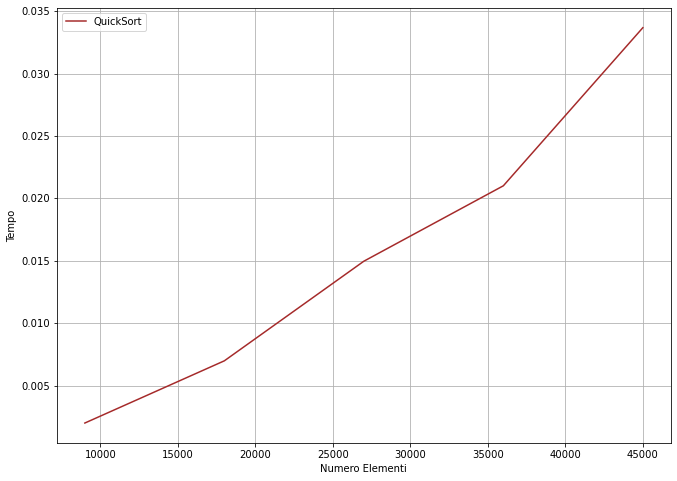

In [67]:
#QUICK
elements_quickO = list()
times_quickO = list()
for i in range(1, 6):
  
    xinsertion = data_2['eta_polizza'] 
    _subset = xinsertion[0 : 9000*i]
    arr = np.array(_subset)
    list_quick = arr.tolist()
    start = time.time()
    quickSort(list_quick)
    end = time.time()
  
    print(len(list_quick), "Elements Sorted by QuickSort in ", end-start)
    elements_quickO.append(len(list_quick))
    times_quickO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quickO, times_quickO, label ='QuickSort',color = 'brown')
plt.grid()
plt.legend()
plt.show()

9000 Elements Sorted by HeapSort in  0.2343745231628418
18000 Elements Sorted by HeapSort in  0.7562241554260254
27000 Elements Sorted by HeapSort in  1.4186913967132568
36000 Elements Sorted by HeapSort in  2.4118621349334717
45000 Elements Sorted by HeapSort in  3.887467384338379


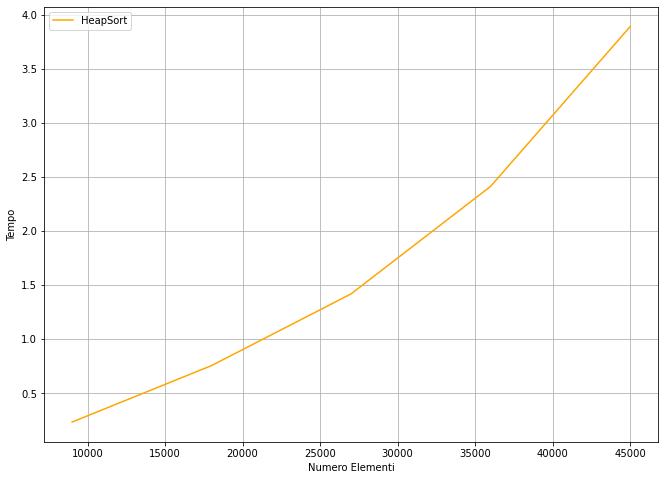

In [69]:
#HEAP
elements_heapO = list()
times_heapO = list()
for i in range(1, 6):
  
    xheap = data_2['eta_polizza'] 
    _subset = xheap[0 : 9000*i]
    arr = np.array(_subset)
    list_heap = arr.tolist()
    start = time.time()
    heapSort(list_heap)
    end = time.time()
  
    print(len(list_heap), "Elements Sorted by HeapSort in ", end-start)
    elements_heapO.append(len(list_heap))
    times_heapO.append(end-start)

    
plt.figure(figsize=(11,8))
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_heapO, times_heapO, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

## Confronto di tutti gli algoritmi
### test con 45mila elementi non ordinati e ordinati

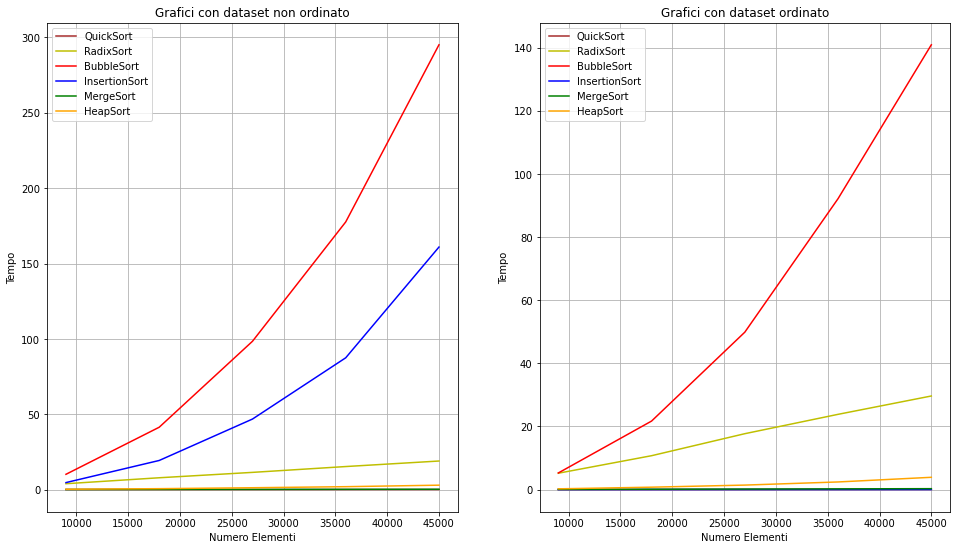

In [71]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Grafici con dataset non ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.plot(elements_radix, times_radix, label ='RadixSort',color = 'y')
plt.plot(elements_bubble, times_bubble, label ='BubbleSort',color = 'r')
plt.plot(elements_inse, times_inse, label ='InsertionSort',color = 'b')
plt.plot(elements_merge, times_merge, label ='MergeSort',color = 'g')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quickO, times_quickO, label ='QuickSort',color = 'brown')
plt.plot(elements_radixO, times_radixO, label ='RadixSort',color = 'y')
plt.plot(elements_bubbleO, times_bubbleO, label ='BubbleSort',color = 'r')
plt.plot(elements_inseO, times_inseO, label ='InsertionSort',color = 'b')
plt.plot(elements_mergeO, times_mergeO, label ='MergeSort',color = 'g')
plt.plot(elements_heapO, times_heapO, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

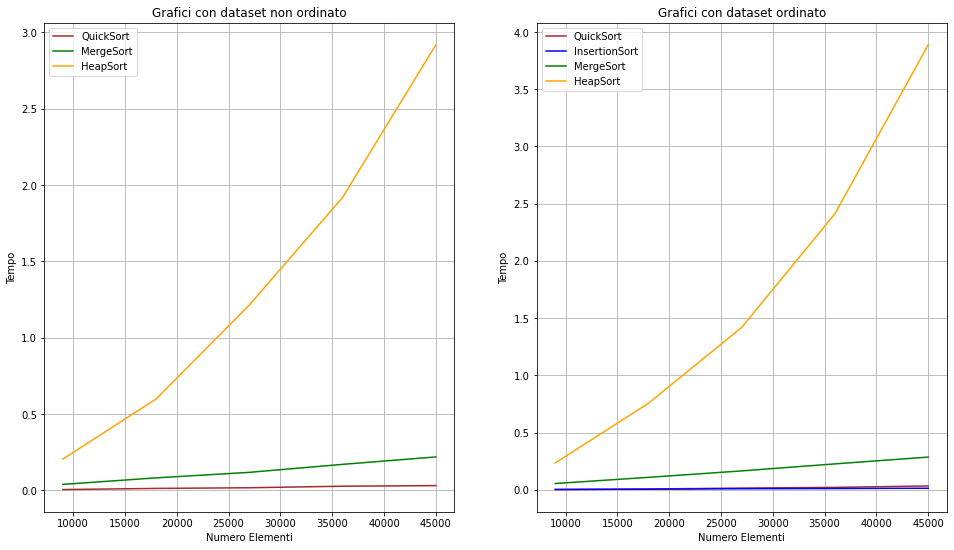

In [72]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Grafici con dataset non ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.plot(elements_merge, times_merge, label ='MergeSort',color = 'g')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quickO, times_quickO, label ='QuickSort',color = 'brown')
plt.plot(elements_inseO, times_inseO, label ='InsertionSort',color = 'b')
plt.plot(elements_mergeO, times_mergeO, label ='MergeSort',color = 'g')
plt.plot(elements_heapO, times_heapO, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

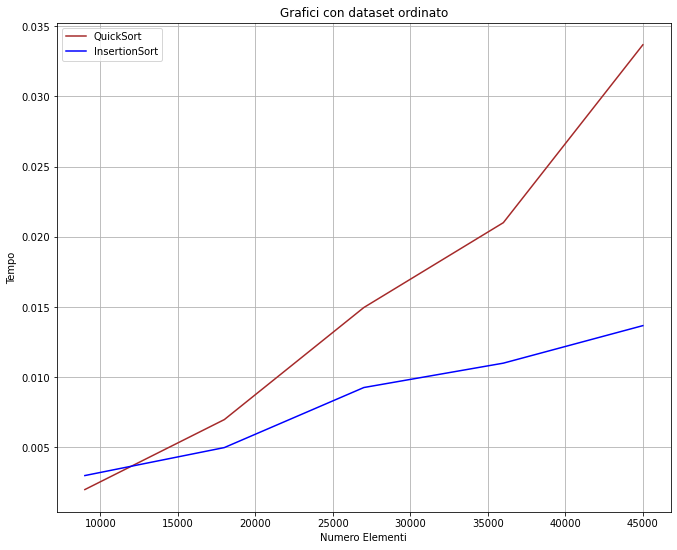

In [74]:
plt.figure(figsize=(11, 9))
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quickO, times_quickO, label ='QuickSort',color = 'brown')
plt.plot(elements_inseO, times_inseO, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

# Grafici tempo esecuzione singoli algoritmi
## Record ordinati su numeri interi
### test su 8mila elementi

In [75]:
#MERGE
elements_merge8kO = list()
times_merge8kO = list()
for i in range(1, 9):
  
    xmerge = data_2['eta_polizza'] 
    _subset = xmerge[0 : 1000*i]
    arr = np.array(_subset)
    list_merge = arr.tolist()
    start = time.time()
    mergeSort(list_merge)
    end = time.time()
  
    print(len(list_merge), "Elements Sorted by MergeSort in ", end-start)
    elements_merge8kO.append(len(list_merge))
    times_merge8kO.append(end-start)

1000 Elements Sorted by MergeSort in  0.004987239837646484
2000 Elements Sorted by MergeSort in  0.009975194931030273
3000 Elements Sorted by MergeSort in  0.015593767166137695
4000 Elements Sorted by MergeSort in  0.021464109420776367
5000 Elements Sorted by MergeSort in  0.02794671058654785
6000 Elements Sorted by MergeSort in  0.032911062240600586
7000 Elements Sorted by MergeSort in  0.039541006088256836
8000 Elements Sorted by MergeSort in  0.042919158935546875


In [76]:
#BUBBLE
elements_bubble8kO = list()
times_bubble8kO = list()
for i in range(1, 9):
  
    xbubble = data_2['eta_polizza'] 
    _subset = xbubble[0 : 1000*i]
    arr = np.array(_subset)
    list_bubble = arr.tolist()
    start = time.time()
    bubbleSort(list_bubble)
    end = time.time()
  
    print(len(list_bubble), "Elements Sorted by BubbleSort in ", end-start)
    elements_bubble8kO.append(len(list_bubble))
    times_bubble8kO.append(end-start)

1000 Elements Sorted by BubbleSort in  0.06981611251831055
2000 Elements Sorted by BubbleSort in  0.25875282287597656
3000 Elements Sorted by BubbleSort in  0.5730204582214355
4000 Elements Sorted by BubbleSort in  1.0050933361053467
5000 Elements Sorted by BubbleSort in  1.5920770168304443
6000 Elements Sorted by BubbleSort in  2.248870611190796
7000 Elements Sorted by BubbleSort in  3.202678680419922
8000 Elements Sorted by BubbleSort in  4.033406972885132


In [78]:
#INSERTION
elements_inse8kO = list()
times_inse8kO = list()
for i in range(1, 9):
  
    xinsertion = data_2['eta_polizza'] 
    _subset = xinsertion[0 : 1000*i]
    arr = np.array(_subset)
    list_inse = arr.tolist()
    start = time.time()
    insertionSort(list_inse)
    end = time.time()
  
    print(len(list_inse), "Elements Sorted by InsertionSort in ", end-start)
    elements_inse8kO.append(len(list_inse))
    times_inse8kO.append(end-start)

1000 Elements Sorted by InsertionSort in  0.0009965896606445312
2000 Elements Sorted by InsertionSort in  0.0009961128234863281
3000 Elements Sorted by InsertionSort in  0.0009958744049072266
4000 Elements Sorted by InsertionSort in  0.0009982585906982422
5000 Elements Sorted by InsertionSort in  0.0024840831756591797
6000 Elements Sorted by InsertionSort in  0.001994609832763672
7000 Elements Sorted by InsertionSort in  0.0019865036010742188
8000 Elements Sorted by InsertionSort in  0.0024061203002929688


In [81]:
#RADIX
elements_radix8kO = list()
times_radix8kO = list()
for i in range(1, 9):
  
    xradix = data_2['eta_polizza'] 
    _subset = xradix[0 : 1000*i]
    arr = np.array(_subset)
    list_radix = arr.tolist()
    start = time.time()
    radixSort(list_radix)
    end = time.time()
  
    print(len(list_radix), "Elements Sorted by RadixSort in ", end-start)
    elements_radix8kO.append(len(list_radix))
    times_radix8kO.append(end-start)

1000 Elements Sorted by RadixSort in  0.0
2000 Elements Sorted by RadixSort in  0.0
3000 Elements Sorted by RadixSort in  1.4703762531280518
4000 Elements Sorted by RadixSort in  2.0469043254852295
5000 Elements Sorted by RadixSort in  2.5654067993164062
6000 Elements Sorted by RadixSort in  3.2740283012390137
7000 Elements Sorted by RadixSort in  3.8777706623077393
8000 Elements Sorted by RadixSort in  4.465564250946045


In [83]:
#QUICK
elements_quick8kO = list()
times_quick8kO = list()
for i in range(1, 9):
  
    xinsertion = data_2['eta_polizza'] 
    _subset = xinsertion[0 : 1000*i]
    arr = np.array(_subset)
    list_quick = arr.tolist()
    start = time.time()
    quickSort(list_quick)
    end = time.time()
  
    print(len(list_quick), "Elements Sorted by QuickSort in ", end-start)
    elements_quick8kO.append(len(list_quick))
    times_quick8kO.append(end-start)

1000 Elements Sorted by QuickSort in  0.0
2000 Elements Sorted by QuickSort in  0.0
3000 Elements Sorted by QuickSort in  0.000997304916381836
4000 Elements Sorted by QuickSort in  0.0009958744049072266
5000 Elements Sorted by QuickSort in  0.000997781753540039
6000 Elements Sorted by QuickSort in  0.001996278762817383
7000 Elements Sorted by QuickSort in  0.0019931793212890625
8000 Elements Sorted by QuickSort in  0.0029916763305664062


In [84]:
#HEAP
elements_heap8kO = list()
times_heap8kO = list()
for i in range(1, 9):
  
    xheap = data_2['eta_polizza'] 
    _subset = xheap[0 : 1000*i]
    arr = np.array(_subset)
    list_heap = arr.tolist()
    start = time.time()
    heapSort(list_heap)
    end = time.time()
  
    print(len(list_heap), "Elements Sorted by HeapSort in ", end-start)
    elements_heap8kO.append(len(list_heap))
    times_heap8kO.append(end-start)

1000 Elements Sorted by HeapSort in  0.003989219665527344
2000 Elements Sorted by HeapSort in  0.012882709503173828
3000 Elements Sorted by HeapSort in  0.043401479721069336
4000 Elements Sorted by HeapSort in  0.05585145950317383
5000 Elements Sorted by HeapSort in  0.07679557800292969
6000 Elements Sorted by HeapSort in  0.0991513729095459
7000 Elements Sorted by HeapSort in  0.15259313583374023
8000 Elements Sorted by HeapSort in  0.17644405364990234


## Confronto di tutti gli algoritmi
### test con 8mila elementi non ordinati e ordinati

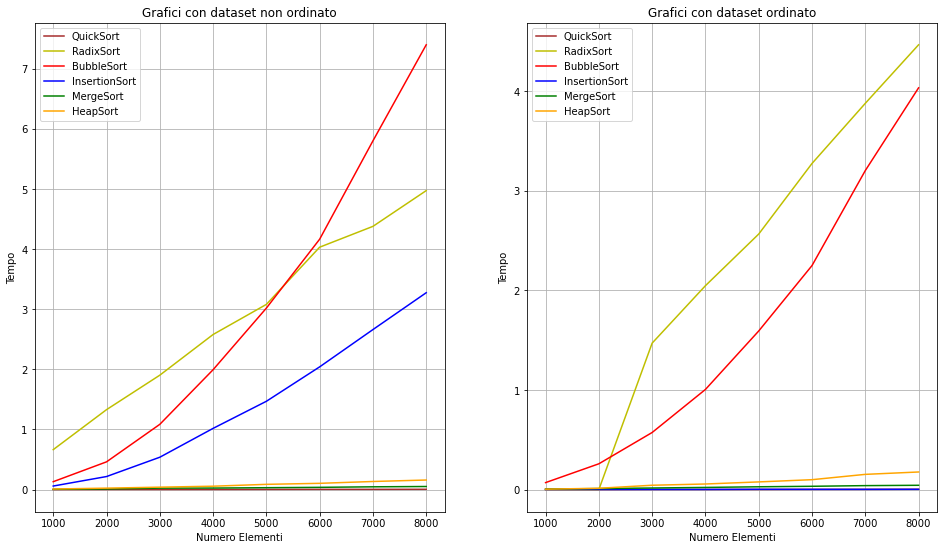

In [85]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Grafici con dataset non ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8k, times_quick8k, label ='QuickSort',color = 'brown')
plt.plot(elements_radix8k, times_radix8k, label ='RadixSort',color = 'y')
plt.plot(elements_bubble8k, times_bubble8k, label ='BubbleSort',color = 'r')
plt.plot(elements_inse8k, times_inse8k, label ='InsertionSort',color = 'b')
plt.plot(elements_merge8k, times_merge8k, label ='MergeSort',color = 'g')
plt.plot(elements_heap8k, times_heap8k, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8kO, times_quick8kO, label ='QuickSort',color = 'brown')
plt.plot(elements_radix8kO, times_radix8kO, label ='RadixSort',color = 'y')
plt.plot(elements_bubble8kO, times_bubble8kO, label ='BubbleSort',color = 'r')
plt.plot(elements_inse8kO, times_inse8kO, label ='InsertionSort',color = 'b')
plt.plot(elements_merge8kO, times_merge8kO, label ='MergeSort',color = 'g')
plt.plot(elements_heap8kO, times_heap8kO, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

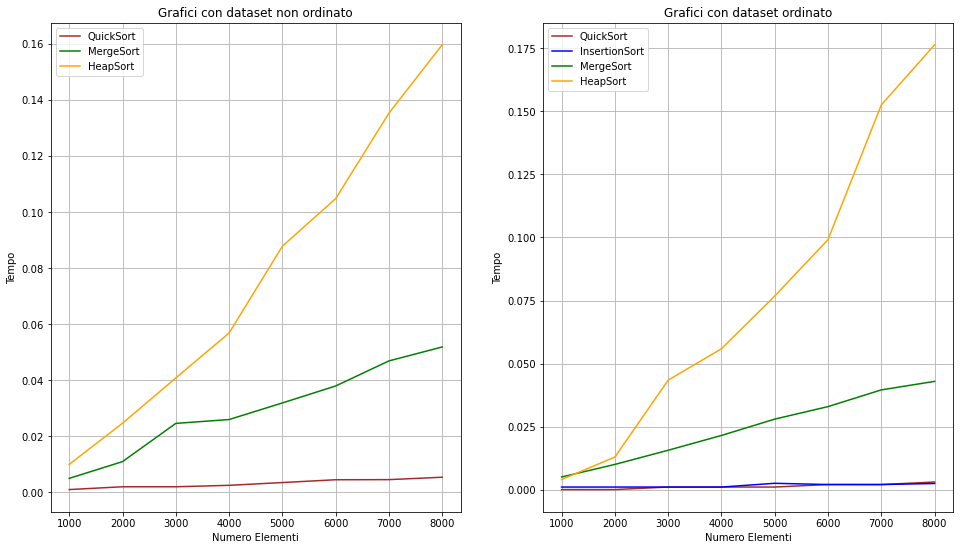

In [86]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Grafici con dataset non ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8k, times_quick8k, label ='QuickSort',color = 'brown')
plt.plot(elements_merge8k, times_merge8k, label ='MergeSort',color = 'g')
plt.plot(elements_heap8k, times_heap8k, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8kO, times_quick8kO, label ='QuickSort',color = 'brown')
plt.plot(elements_inse8kO, times_inse8kO, label ='InsertionSort',color = 'b')
plt.plot(elements_merge8kO, times_merge8kO, label ='MergeSort',color = 'g')
plt.plot(elements_heap8kO, times_heap8kO, label ='HeapSort',color = 'orange')
plt.grid()
plt.legend()
plt.show()

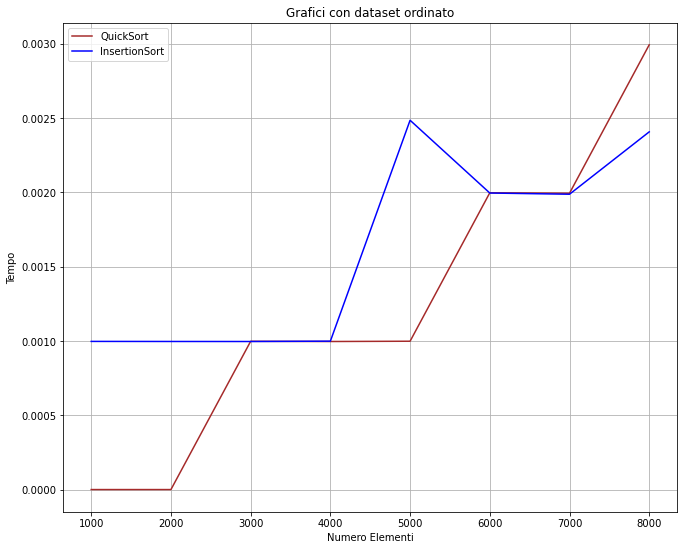

In [87]:
plt.figure(figsize=(11, 9))
plt.title('Grafici con dataset ordinato')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick8kO, times_quick8kO, label ='QuickSort',color = 'brown')
plt.plot(elements_inse8kO, times_inse8kO, label ='InsertionSort',color = 'b')
plt.grid()
plt.legend()
plt.show()

# Confronto tra grafici algoritmi singoli ordinati e non 

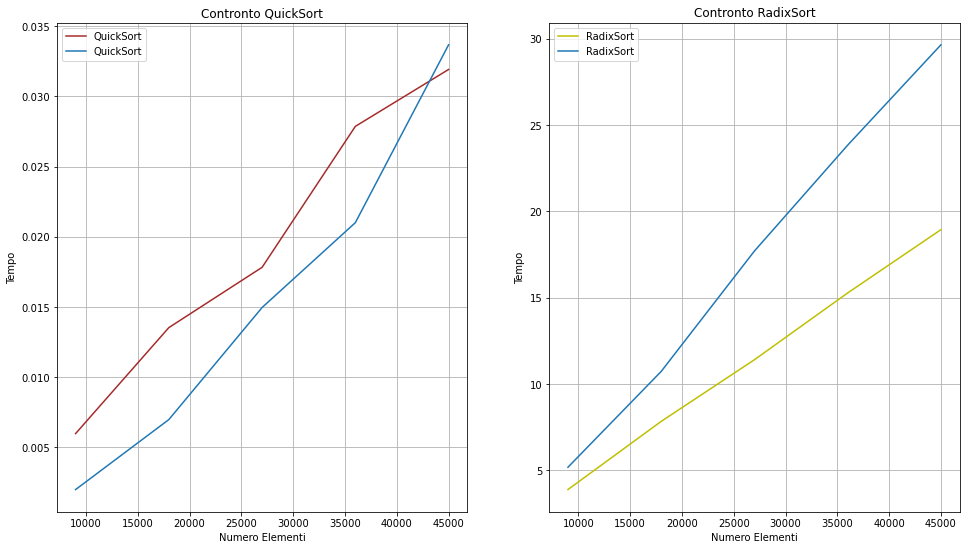

In [90]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Contronto QuickSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_quick, times_quick, label ='QuickSort',color = 'brown')
plt.plot(elements_quickO, times_quickO, label ='QuickSort')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Contronto RadixSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_radix, times_radix, label ='RadixSort',color = 'y')
plt.plot(elements_radixO, times_radixO, label ='RadixSort')
plt.grid()
plt.legend()
plt.show()

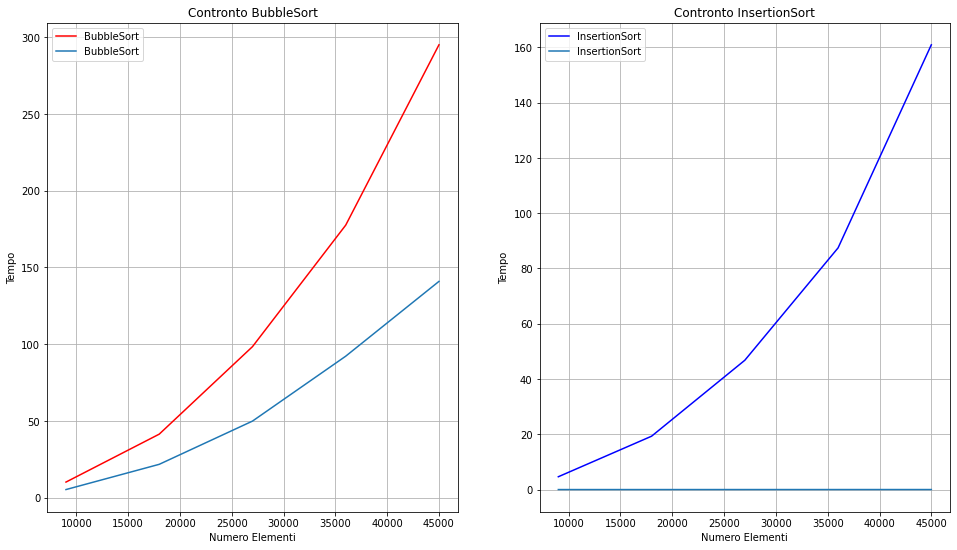

In [93]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Contronto BubbleSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_bubble, times_bubble, label ='BubbleSort',color = 'r')
plt.plot(elements_bubbleO, times_bubbleO, label ='BubbleSort')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Contronto InsertionSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_inse, times_inse, label ='InsertionSort',color = 'b')
plt.plot(elements_inseO, times_inseO, label ='InsertionSort')
plt.grid()
plt.legend()
plt.show()

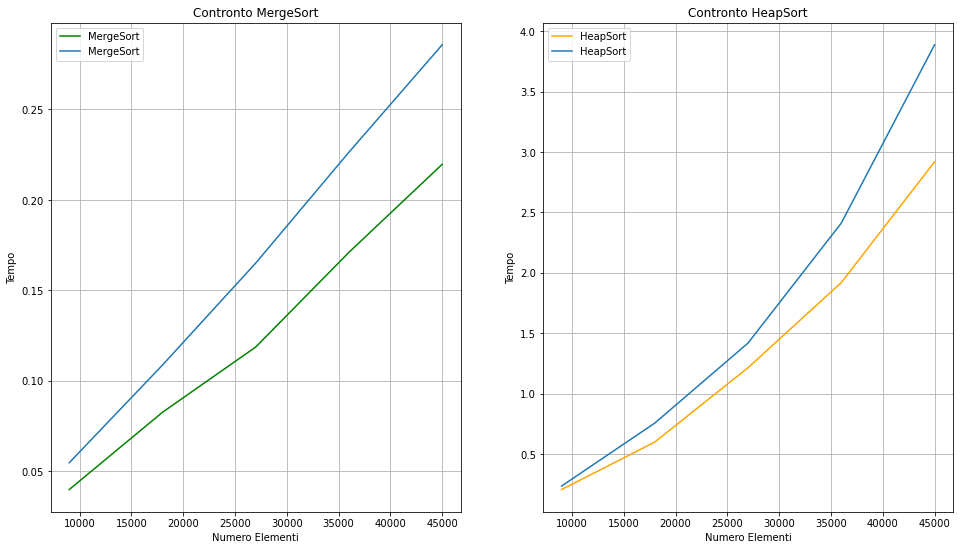

In [94]:
plt.figure(figsize=(25, 9))
plt.subplot(131)
plt.title('Contronto MergeSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_merge, times_merge, label ='MergeSort',color = 'g')
plt.plot(elements_mergeO, times_mergeO, label ='MergeSort')
plt.grid()
plt.legend()

plt.subplot(132)
plt.title('Contronto HeapSort')
plt.xlabel('Numero Elementi')
plt.ylabel('Tempo')
plt.plot(elements_heap, times_heap, label ='HeapSort',color = 'orange')
plt.plot(elements_heapO, times_heapO, label ='HeapSort')
plt.grid()
plt.legend()
plt.show()